k-Means Clustering	:
    Clustering Algo -> Properties of the data, optimal division,labeling of groups
    Introducing k-Means ->k-means clustering by Scikit 
    Syntax: sklearn.cluster.KMeans
	k-Means Algorithm
	Expectation–Maximization

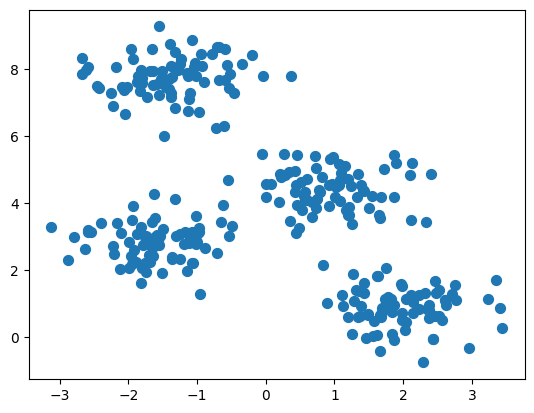

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

C:\Users\bjawa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


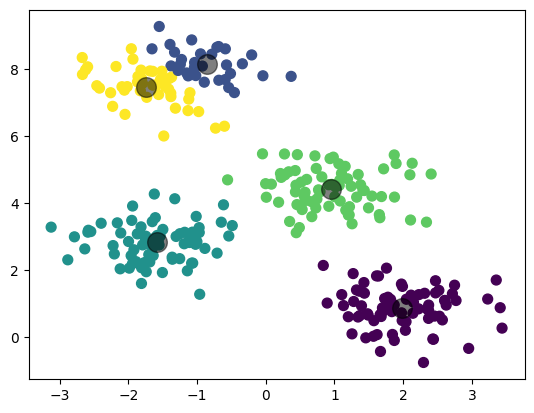

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


Expectation–Maximization:
1.Guess some cluster centers
2.Repeat until converged
E-Step: assign points to the nearest cluster center
M-Step: set the cluster centers to the mean


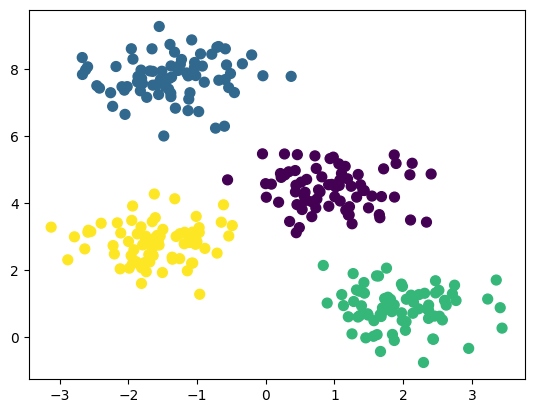

In [5]:
from sklearn.metrics import pairwise_distances_argmin


def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels


centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Gaussian Mixture Models	 (GMM) ->. powerful method of clustering
    Motivating GMM: Weaknesses of k-Means 
	Generalizing E–M: Gaussian Mixture Models
	GMM as Density Estimation

C:\Users\bjawa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


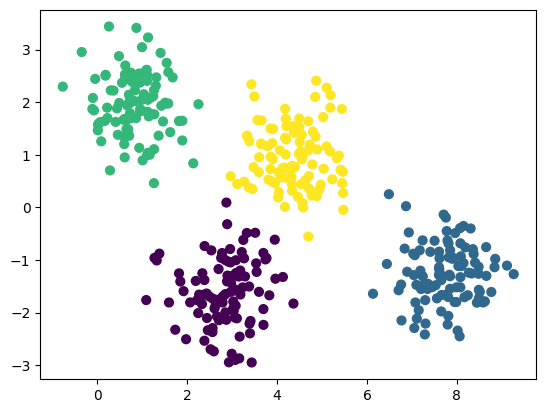

In [8]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

C:\Users\bjawa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


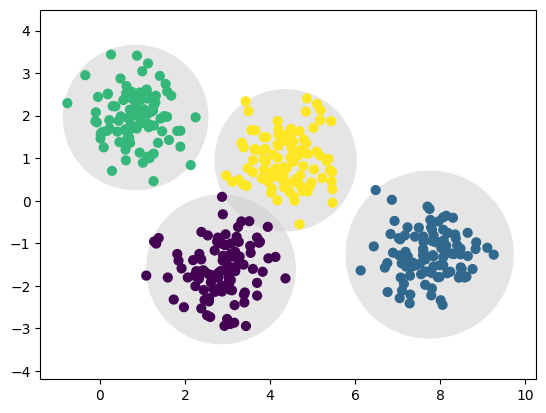

In [10]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

C:\Users\bjawa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


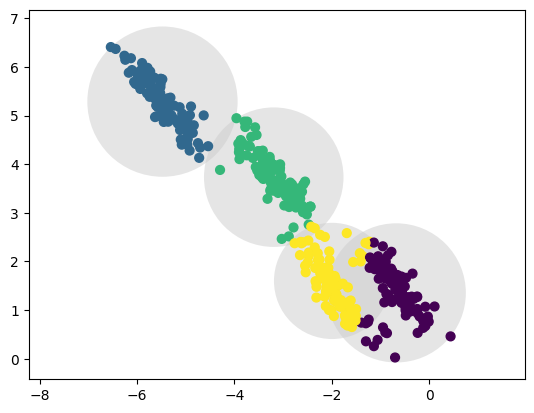

In [11]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

Types of clustering:

1.K-D trees - splits into (K) clusters based on Decision Trees.
2.K-Means - splits data into specified (K) number of populations.
3.Gaussian Mixture - fits a mixture of K gaussians to the data.
4.Agglomerative Clustering - Bottom to Top approach of hierarchical clustering.

Other Important algo used in clustering:
1.Connectivity-based Clustering (Hierarchical clustering) --> distance (Euclidean, squared Euclidean, Manhatten)
    a. Agglomerative 
    b. Divisive
    Lacks scalability for BIG DATA(hadoop , hive , pig)
    Popular Algorithms: Hierarchical [ O(n^2)] and its variants, K-D Trees.
2.Centroids-based Clustering (Partitioning methods)
    Can handle BIG DATA due to linear complexity
    Popular Algorithms: K- Means[ O(n)], K- Modes, K - Medians.
3.Distribution-based Clustering (binomial , gaussian)
     Often suffer from Overfitting
     Popular Algorithms: GMM ( Gaussian Mixture Model), EM - algo ( expectation maximization).
4.Density-based Clustering (Model-based methods)
    Popular Algorithms: DBSCAN, OPTICS
5.Fuzzy Clustering - Not widely used…
    membership coefficient that varies from 0 to 1
6.Constraint-based (Supervised Clustering) - Not Widely used
    tree-based, Classification machine learning algorithms like Decision Trees, Random Forest, and Gradient Boosting, etc. are made use of to attain constraint-based clustering.

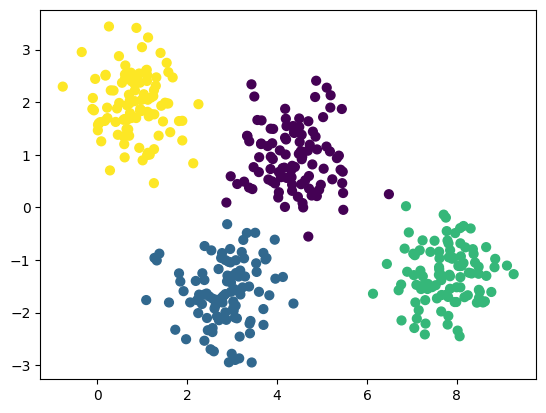

In [25]:
#Generalizing E–M: Gaussian Mixture Models
#from sklearn import mixture
from sklearn.mixture import GaussianMixture  as GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
# unique clusters 
uni =unique(labels)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');


C:\Users\bjawa\AppData\Local\Temp\ipykernel_41536\1135903301.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


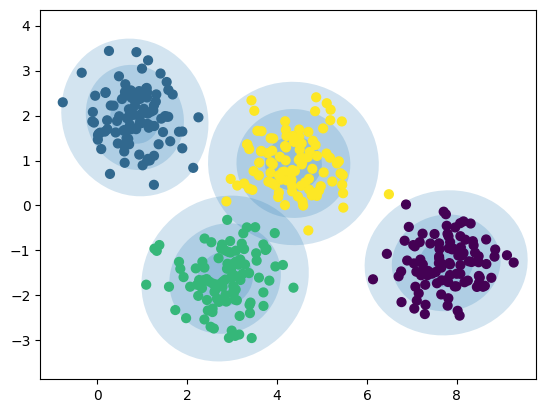

In [29]:
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
#gmm = GMM(n_components=4, random_state=42)
gmm2=GMM(n_components=4,covariance_type='full')
plot_gmm(gmm2, X)

C:\Users\bjawa\AppData\Local\Temp\ipykernel_41536\1135903301.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


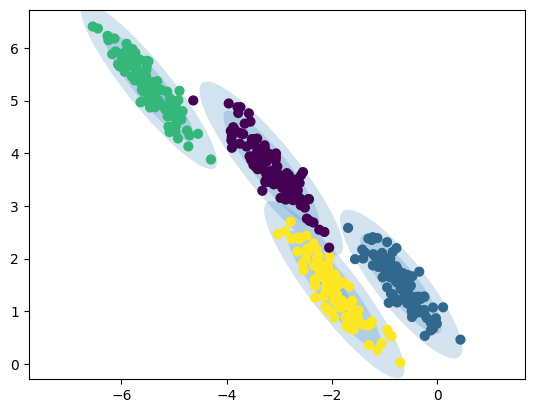

In [30]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

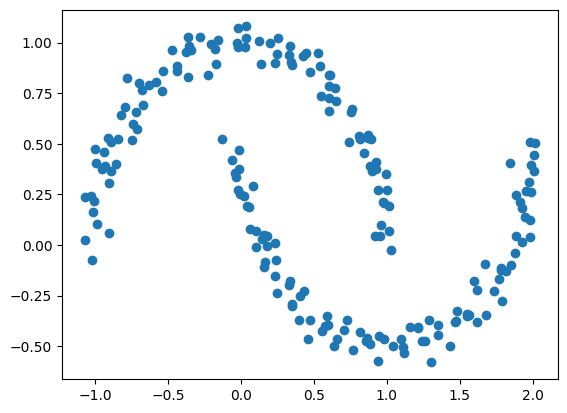

In [32]:
#GMM as Density Estimation
#make_moons

from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

C:\Users\bjawa\AppData\Local\Temp\ipykernel_41536\1135903301.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


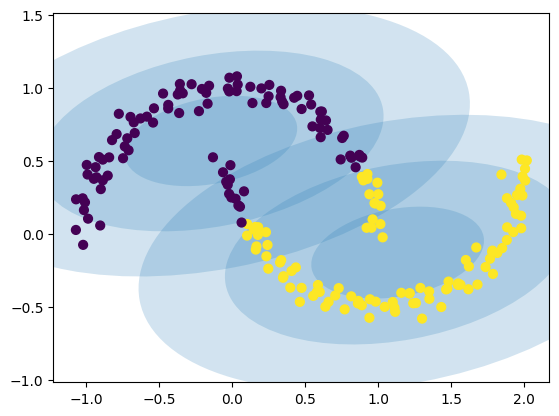

In [33]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

C:\Users\bjawa\AppData\Local\Temp\ipykernel_41536\1135903301.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


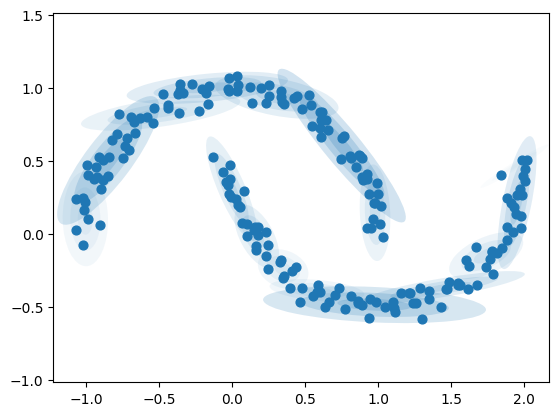

In [34]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

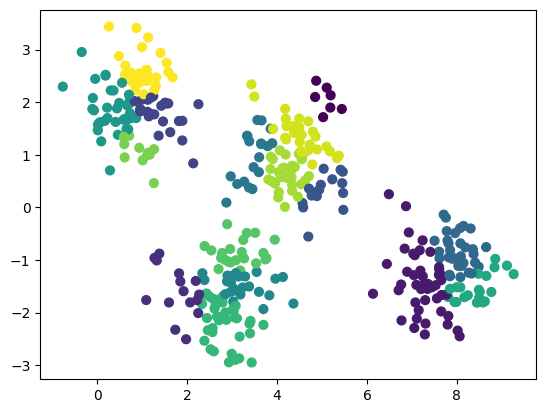

In [39]:
from sklearn.mixture import GaussianMixture  as GMM
gmm16 = GMM(n_components=16).fit(X)
labels = gmm16.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');


Kernel Density Estimation	-> Gaussian +Logical extreme
    Motivating KDE: Histograms
	Kernel Density Estimation in Practice
	KDE on a Sphere

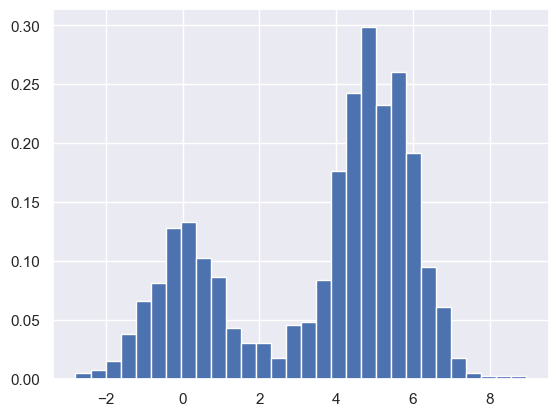

In [43]:
#Motivating KDE: Histograms
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)
hist = plt.hist(x, bins=30, density=True)


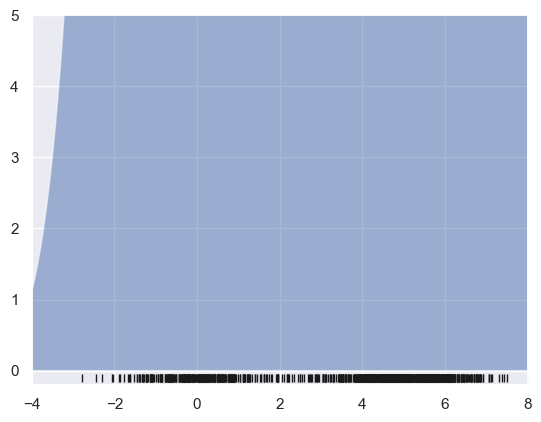

In [47]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);

(-0.02, 0.22)

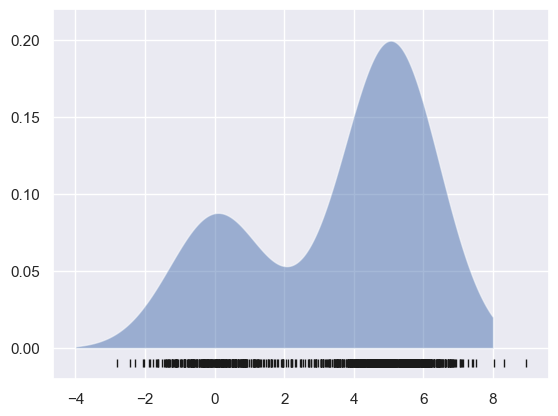

In [56]:
#Kernel Density Estimation in Practice
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)